In [1]:
#import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import statistics

In [4]:
data = pd.read_csv('datasets/data.csv',index_col=0)
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5


In [20]:
#Dataset from train.csv
data_dummies=pd.get_dummies(data,drop_first=True)
data_dummies.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0


## Forecasting

In [5]:
#import features dataset
features = pd.read_csv('datasets/features.csv')

In [6]:
#import stores dataset
stores = pd.read_csv('datasets/stores.csv')

In [7]:
#import test dataset
test = pd.read_csv('datasets/test.csv')

In [8]:
#to begin with, combine 3 dataset into 1 for training purpose
t_data = test.merge(features, on=['Store', 'Date','IsHoliday'], how='inner').merge(stores, on=['Store'], how='inner')

In [9]:
# Transform the date into year, month, week, day for monthly/weekly sales analysis
from datetime import date
import datetime
t_data['Date'] = pd.to_datetime(t_data['Date'])
t_data['Year'] = t_data['Date'].dt.year
t_data['Month'] = t_data['Date'].dt.month
t_data['Week'] = t_data['Date'].dt.week
t_data.head()

/var/folders/c2/1tnqmf6d7bn3vn454gkflvgr0000gn/T/ipykernel_69105/1520086352.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  t_data['Week'] = t_data['Date'].dt.week


,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44


In [10]:
t_data.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

In [11]:
t_data['IsHoliday'] = [1 if x == True else 0 for x in t_data['IsHoliday']]

In [12]:
t_data_dummies=pd.get_dummies(t_data,drop_first=True)

In [13]:
t_data_dummies['Weekly_Sales'] = 0

In [14]:
t_data_dummies = t_data_dummies[['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Year', 'Month', 'Week',
       'Type_B', 'Type_C']]

In [15]:
t_data_dummies['CPI'] = t_data_dummies['CPI'].fillna(0)
t_data_dummies['Unemployment'] = t_data_dummies['Unemployment'].fillna(0)

In [16]:
t_data_dummies_2 = t_data_dummies.copy()

In [17]:
#Dataset from train.csv (to be tested without CPI)
t_data_dummies.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Type_B,Type_C
0,1,1,2012-11-02,0,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
1,1,2,2012-11-02,0,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
2,1,3,2012-11-02,0,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
3,1,4,2012-11-02,0,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
4,1,5,2012-11-02,0,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0


In [18]:
#Dataset from train.csv (to be tested with CPI)
t_data_dummies_2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Type_B,Type_C
0,1,1,2012-11-02,0,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
1,1,2,2012-11-02,0,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
2,1,3,2012-11-02,0,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
3,1,4,2012-11-02,0,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
4,1,5,2012-11-02,0,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0


In [21]:
X_train = data_dummies[['Store','Dept','Size','Week']]
y_train = data_dummies['Weekly_Sales']
X_test = t_data_dummies[['Store','Dept','Size','Week']]
y_test = t_data_dummies['Weekly_Sales']

In [22]:
X_train_2 = data_dummies[['Store','Dept','Size','Week','CPI']]
y_train_2 = data_dummies['Weekly_Sales']
X_test_2 = t_data_dummies[['Store','Dept','Size','Week','CPI']]
y_test_2 = t_data_dummies['Weekly_Sales']

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
np.set_printoptions(precision=5)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)
np.set_printoptions(precision=5)

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_ = RandomForestRegressor(random_state=42, n_estimators=10)
rf_.fit(X_train, y_train)
y_pred_rf_ = rf_.predict(X_test)

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf_ = RandomForestRegressor(random_state=42, n_estimators=10)
rf_.fit(X_train_2, y_train_2)
y_pred_rf_2 = rf_.predict(X_test_2)

In [27]:
y_pred_rf_

array([36249.56967, 46553.784  ,  9317.79615, ..., 53091.67403,
        6239.59   ,   342.13375])

In [28]:
y_pred_rf_2

array([26393.466, 44788.561,  9578.154, ..., 52373.554,  6525.38 ,
          89.144])

In [29]:
t_data_dummies['Weekly_Sales'] = y_pred_rf_

In [30]:
t_data_dummies_2['Weekly_Sales'] = y_pred_rf_2

In [31]:
data_dummies.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Type_B,Type_C
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,192.308899,8.667,118221,2012,10,43,1,0
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,192.308899,8.667,118221,2012,10,43,1,0
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,192.308899,8.667,118221,2012,10,43,1,0
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,192.308899,8.667,118221,2012,10,43,1,0
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,192.308899,8.667,118221,2012,10,43,1,0


In [32]:
t_data_dummies.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Type_B,Type_C
0,1,1,2012-11-02,36249.569667,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
1,1,2,2012-11-02,46553.784000,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
2,1,3,2012-11-02,9317.796150,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
3,1,4,2012-11-02,38541.718417,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
4,1,5,2012-11-02,27692.561000,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0


In [33]:
t_data_dummies_2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Type_B,Type_C
0,1,1,2012-11-02,26393.466,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
1,1,2,2012-11-02,44788.561,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
2,1,3,2012-11-02,9578.154,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
3,1,4,2012-11-02,36112.668,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0
4,1,5,2012-11-02,27360.038,0,55.32,3.386,223.462779,6.573,151315,2012,11,44,0,0


Text(0.5, 1.0, 'Weekly sales by year')

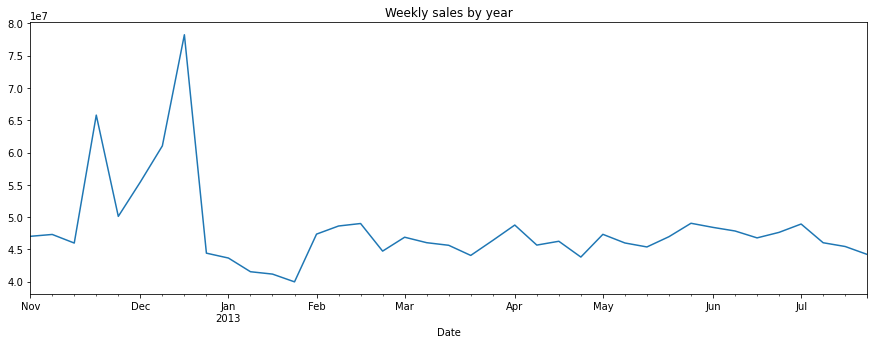

In [34]:
t_data_dummies.groupby(['Date'])['Weekly_Sales'].sum().plot.line(figsize=(15,5))
plt.title('Weekly sales by year')

Text(0.5, 1.0, 'Weekly sales by year')

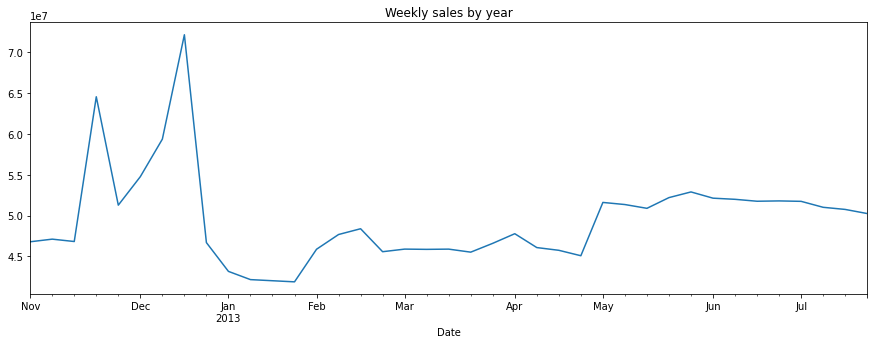

In [35]:
t_data_dummies_2.groupby(['Date'])['Weekly_Sales'].sum().plot.line(figsize=(15,5))
plt.title('Weekly sales by year')

In [36]:
new_data = pd.concat((data_dummies, t_data_dummies))
new_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Type_B,Type_C
0,1,1,2010-02-05,24924.500000,False,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
1,1,2,2010-02-05,50605.270000,False,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
2,1,3,2010-02-05,13740.120000,False,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
3,1,4,2010-02-05,39954.040000,False,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
4,1,5,2010-02-05,32229.380000,False,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,3167.257733,0,76.06,3.804,0.000000,0.000,118221,2013,7,30,1,0
115060,45,94,2013-07-26,4359.311500,0,76.06,3.804,0.000000,0.000,118221,2013,7,30,1,0
115061,45,95,2013-07-26,53091.674033,0,76.06,3.804,0.000000,0.000,118221,2013,7,30,1,0
115062,45,97,2013-07-26,6239.590000,0,76.06,3.804,0.000000,0.000,118221,2013,7,30,1,0


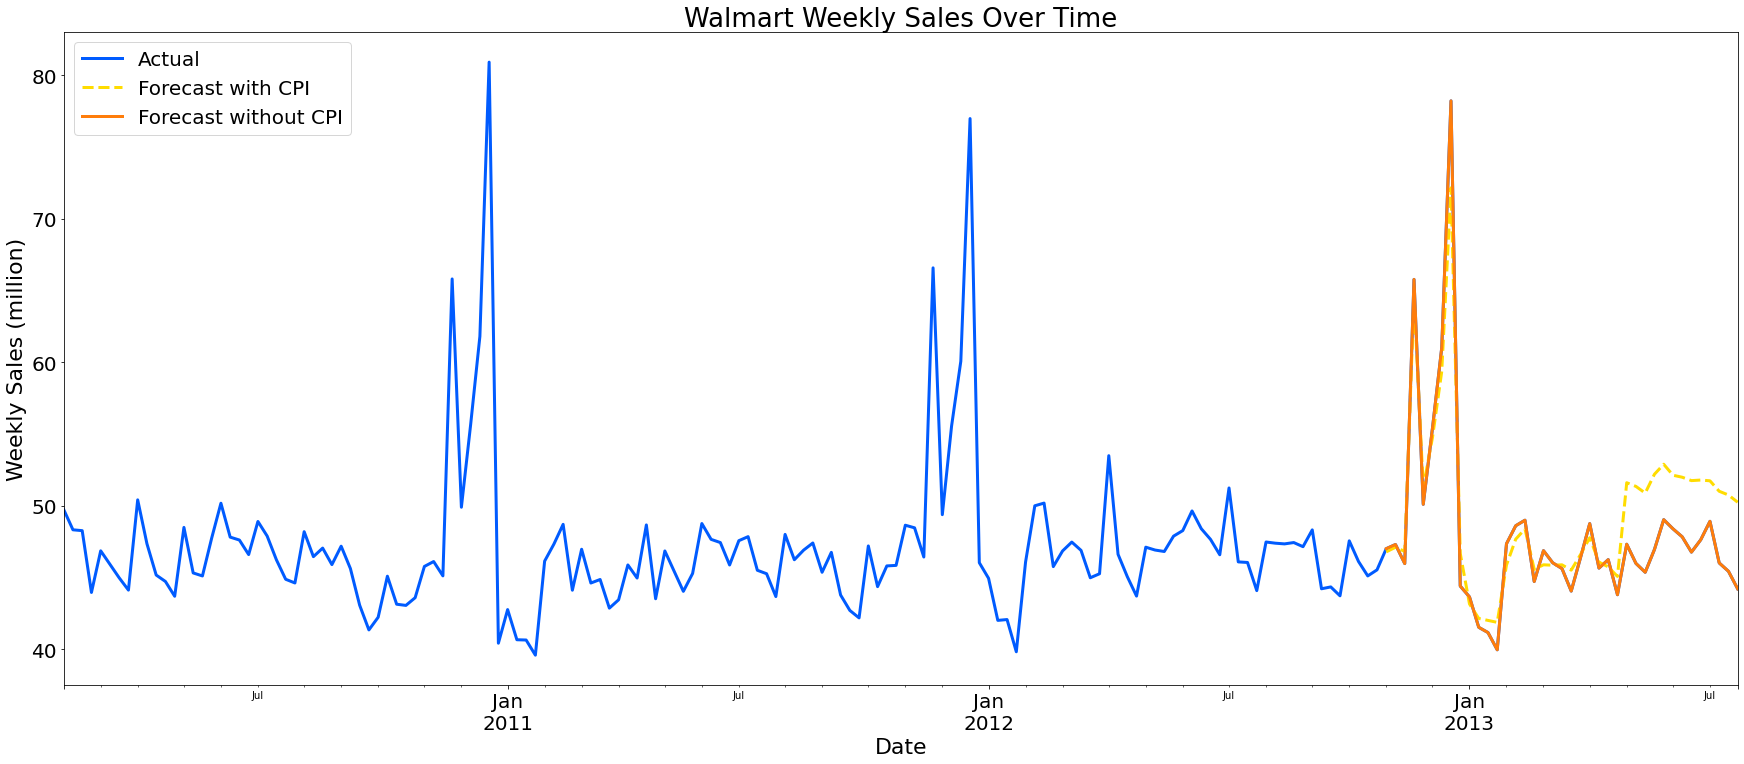

In [37]:
#Plot graph of actual, with CPI forecast and without CPI forecast
import datetime
prediction_start = datetime.datetime(2012, 11, 2)

(new_data.groupby(['Date'])['Weekly_Sales'].sum()/1000000).plot.line(figsize=(30,12),color='#005BFF',linewidth=3, label='Actual')
(t_data_dummies_2.groupby(['Date'])['Weekly_Sales'].sum()/1000000).plot.line(figsize=(30,12),color='#FFDC00',linewidth=3, linestyle='--',label='Forecast with CPI')
(new_data[new_data.Date >= prediction_start].groupby(['Date'])['Weekly_Sales'].sum()/1000000).plot.line(figsize=(30,12),color='#FF7D0B',linewidth=3, label='Forecast without CPI')

plt.rcParams.update({'font.size': 20})
plt.title('Walmart Weekly Sales Over Time',fontsize=26)
plt.xlabel('Date',fontsize=22)
plt.ylabel('Weekly Sales (million)',fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='best', prop={'size': 20})
plt.savefig('Walmart Weekly Sales Over Time (with and without CPI).png', bbox_inches='tight')
plt.show()

In [38]:
#Load result from times series prediction
ts_prediction = pd.read_csv("datasets/predicted_weekly_sales.csv")
ts_prediction = ts_prediction.rename(columns={'predicted_mean': 'Weekly_Sales'})
ts_prediction.head()

,Date,Weekly_Sales
0,2012-11-02,48.099718
1,2012-11-09,47.891106
2,2012-11-16,45.951604
3,2012-11-23,65.120698
4,2012-11-30,48.753723


In [137]:
ts_original = (data_dummies.groupby('Date').Weekly_Sales.sum()/1000000).reset_index()
ts_original.head()

,Date,Weekly_Sales
0,2010-02-05,49.750740
1,2010-02-12,48.336678
2,2010-02-19,48.276994
3,2010-02-26,43.968571
4,2010-03-05,46.871470


In [138]:
ts_new_data = pd.concat((ts_original, ts_prediction))
ts_new_data['Date'] = pd.to_datetime(ts_new_data['Date'])
ts_new_data.head()

,Date,Weekly_Sales
0,2010-02-05,49.750740
1,2010-02-12,48.336678
2,2010-02-19,48.276994
3,2010-02-26,43.968571
4,2010-03-05,46.871470


<Figure size 2160x864 with 0 Axes>

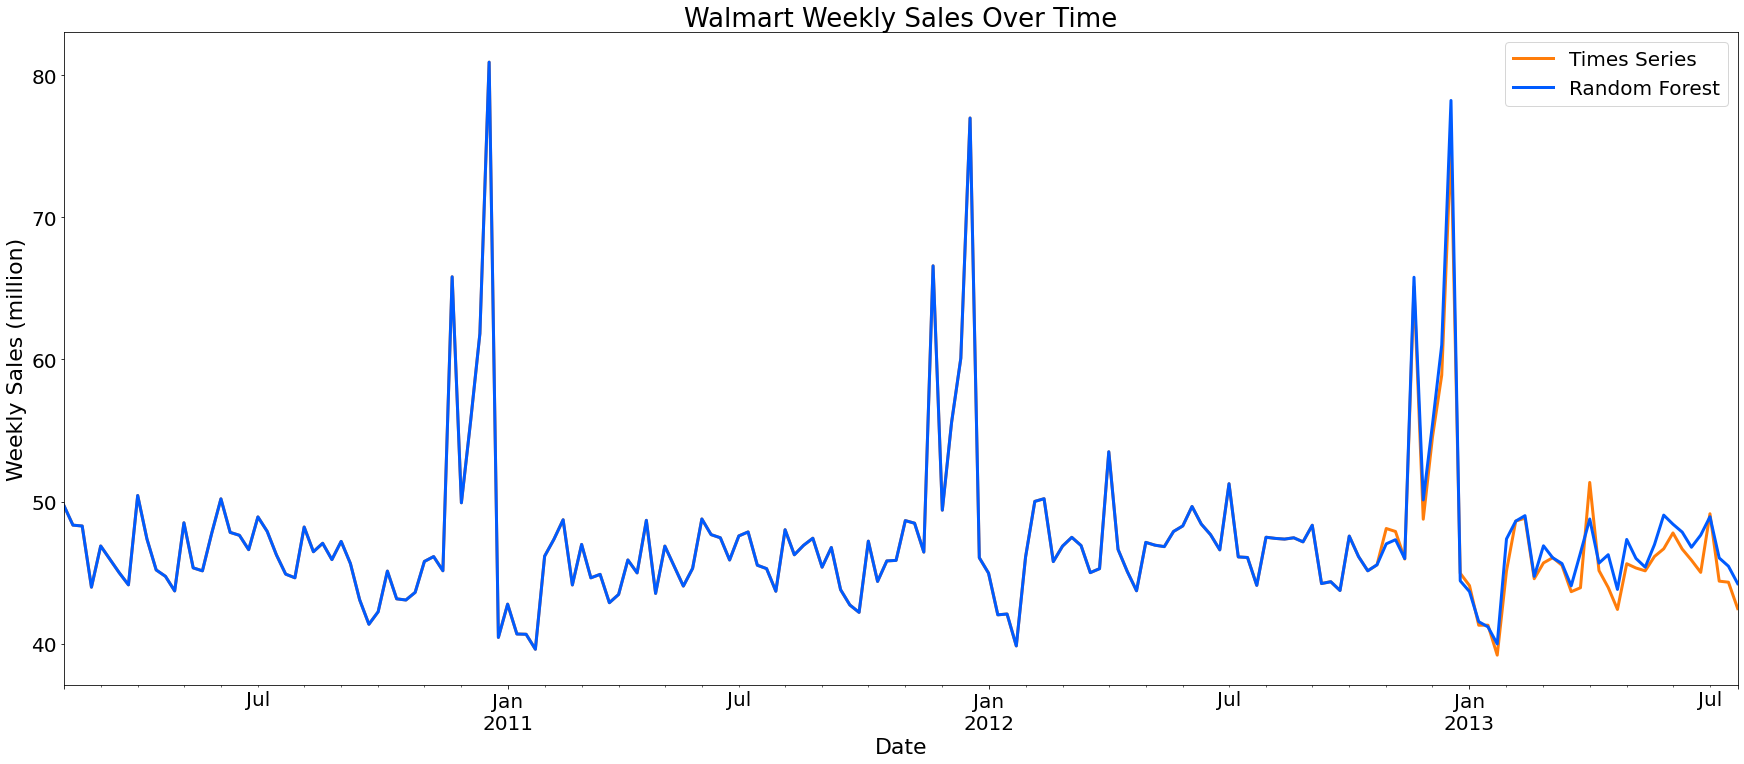

In [139]:
#Plot graph of times series and random forest result
plt.figure(figsize=(30,12))

ts_new_data.plot.line(x='Date',y="Weekly_Sales",figsize=(30,12),color='#FF7D0B',linewidth=3, label='Times Series')
(new_data.groupby(['Date'])['Weekly_Sales'].sum()/1000000).plot.line(figsize=(30,12),color='#005BFF',linewidth=3, label='Random Forest')

plt.rcParams.update({'font.size': 20})
plt.title('Walmart Weekly Sales Over Time',fontsize=26)
plt.xlabel('Date',fontsize=22)
plt.ylabel('Weekly Sales (million)',fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='best', prop={'size': 20})
plt.savefig('Walmart Weekly Sales Over Time (TS vs RF).png', bbox_inches='tight')
plt.show()